In [1]:
from IPython.core.display import clear_output
import torch
# model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet50', pretrained=True)
# or
model = torch.hub.load('pytorch/vision:v0.10.0', 'fcn_resnet101', pretrained=True)
model.eval()
clear_output()

In [2]:
!gdown --id 1tJBw-auxThtoX_7F7NdPmB3yxkMfgwfY

Downloading...
From: https://drive.google.com/uc?id=1tJBw-auxThtoX_7F7NdPmB3yxkMfgwfY
To: /content/764620_1_w_570.jpg
100% 123k/123k [00:00<00:00, 8.59MB/s]


In [22]:
import urllib
url, filename = ("https://raw.githubusercontent.com/onnx/models/master/vision/object_detection_segmentation/fcn/dependencies/voc_classes.txt", "voc_classes.txt")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
input_image = Image.open('/content/764620_1_w_570.jpg')
input_image = input_image.convert("RGB")

In [6]:
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

In [7]:
with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)

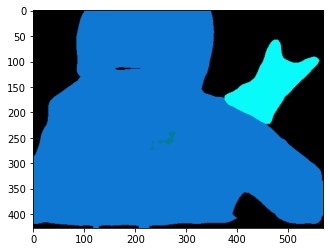

In [8]:
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
r.putpalette(colors)

import matplotlib.pyplot as plt
plt.imshow(r)
# plt.show()

In [25]:
classes_file = open("voc_classes.txt", 'r')
clasess = [c.strip() for c in classes_file.readlines()]

In [26]:
clasess

['__background__',
 'aeroplane',
 'bicycle',
 'bird',
 'boat',
 'bottle',
 'bus',
 'car',
 'cat',
 'chair',
 'cow',
 'diningtable',
 'dog',
 'horse',
 'motorbike',
 'person',
 'pottedplant',
 'sheep',
 'sofa',
 'train',
 'tvmonitor']

In [27]:
target_class = clasess.index('cat')

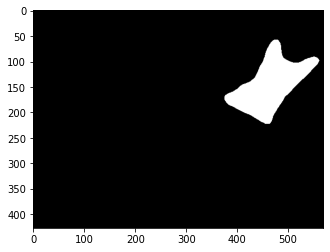

In [28]:
tmp = output_predictions.numpy()

binary_mask = tmp == target_class
binary_mask = binary_mask * 255
plt.imshow(binary_mask, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


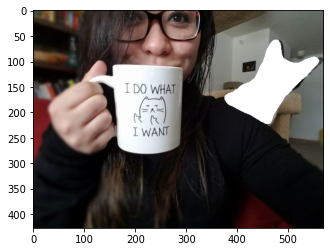

In [40]:
plt.imshow(input_image + np.expand_dims(binary_mask, axis=2))